## Name- Harsh Maurya
## Email- harshs.singh49@gmail.com

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_excel('Churn.xlsx')

In [3]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
#11 missing value in 'TotalCharges'
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [6]:
df['TotalCharges'] = df['TotalCharges'].fillna(0,axis=0)

In [7]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


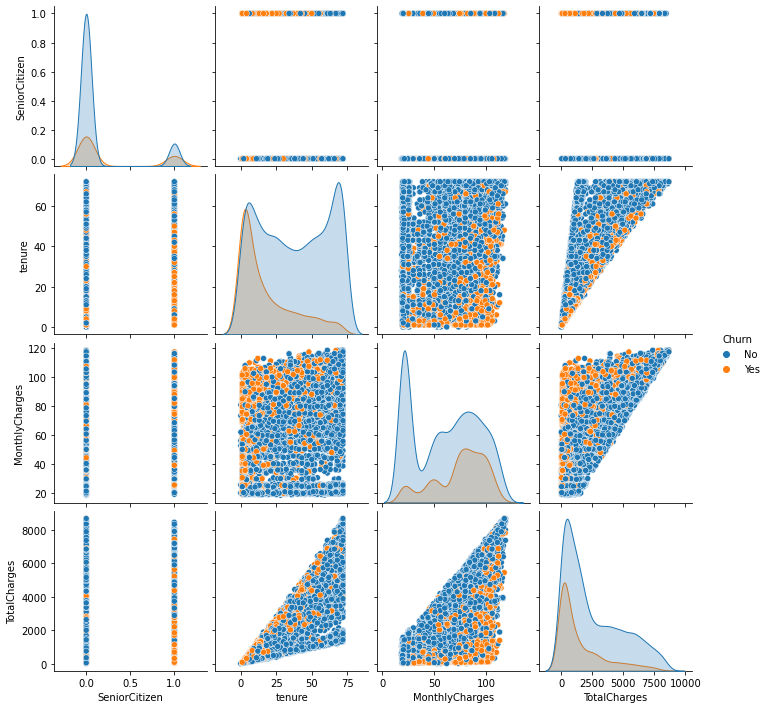

In [9]:
sns.pairplot(df,hue='Churn')

D:\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning

<Figure size 432x288 with 0 Axes>

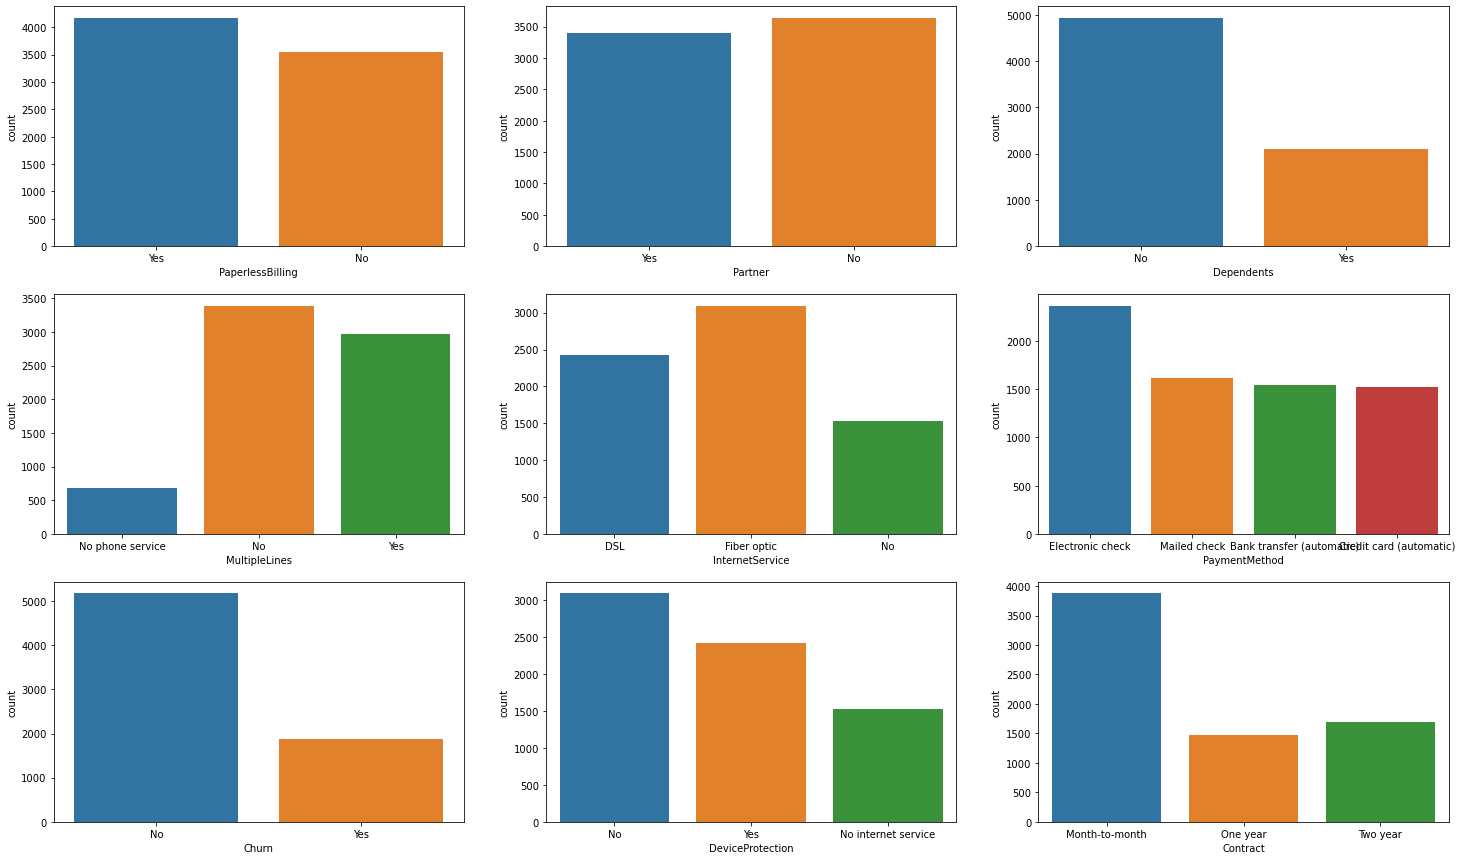

In [10]:
plt.figure()
fig, ax = plt.subplots(3,3,figsize=(25,15))
sns.countplot(df['gender'],ax=ax[0,0])
sns.countplot(df['Partner'],ax=ax[0,1])
sns.countplot(df['Dependents'],ax=ax[0,2])
sns.countplot(df['MultipleLines'],ax=ax[1,0])
sns.countplot(df['InternetService'],ax=ax[1,1])
sns.countplot(df['PaymentMethod'],ax=ax[1,2])
sns.countplot(df['Churn'],ax=ax[2,0])
sns.countplot(df['DeviceProtection'],ax=ax[2,1])
sns.countplot(df['Contract'],ax=ax[2,2])
sns.countplot(df['PaperlessBilling'],ax=ax[0,0])
plt.show()


In [11]:
#Changing the categorical variable to assigned number
label = LabelEncoder()
df['gender'] = label.fit_transform(df['gender'])
df['Partner'] = label.fit_transform(df['Partner'])
df['Dependents'] = label.fit_transform(df['Dependents'])
df['PhoneService'] = label.fit_transform(df['PhoneService'])
df['MultipleLines'] = label.fit_transform(df['MultipleLines'])
df['InternetService'] = label.fit_transform(df['InternetService'])
df['OnlineSecurity'] = label.fit_transform(df['OnlineSecurity'])
df['OnlineBackup'] = label.fit_transform(df['OnlineBackup'])
df['DeviceProtection'] = label.fit_transform(df['DeviceProtection'])
df['TechSupport'] = label.fit_transform(df['TechSupport'])
df['StreamingTV'] = label.fit_transform(df['StreamingTV'])
df['StreamingMovies'] = label.fit_transform(df['StreamingMovies'])
df['Contract'] = label.fit_transform(df['Contract'])
df['PaperlessBilling'] = label.fit_transform(df['PaperlessBilling'])
df['PaymentMethod'] = label.fit_transform(df['PaymentMethod'])
df['Churn'] = label.fit_transform(df['Churn'])

In [12]:
# churn NO is 0 and Churn Yes is 1
df = df.drop('customerID',axis=1)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


In [13]:
# Independent variable is all excluding only 'Churn' & 'customerID'
# Dependent variable is only 'Churn'
X = df.drop('Churn',axis=1)
y = df['Churn']

In [14]:
x1 = sm.add_constant(X)
result = sm.Logit(y,x1).fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.415778
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 7043
Model:                          Logit   Df Residuals:                     7023
Method:                           MLE   Df Model:                           19
Date:                Fri, 02 Jul 2021   Pseudo R-squ.:                  0.2814
Time:                        14:40:56   Log-Likelihood:                -2928.3
converged:                       True   LL-Null:                       -4075.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.4996      0.187     -2.669      0.008      -0.866      -0.133
gender              -0.0270      0.065     -0.419      0.675      -0.154       0.100
SeniorCitizen        0.2378      0.084      2.826      0.005       0.073       0.403
Partner              0.0148      0.077      0.192      0.848      -0.137       0.167
Dependents          -0.1673      0.089     -1.872      0.061      -0.343       0.008
tenure              -0.0589      0.006     -9.507      0.000      -0.071      -0.047
PhoneService        -1.0327      0.146     -7.095      0.000      -1.318      -0.747
MultipleLines        0.0711      0.041      1.753      0.080      -0.008       0.151
InternetService      0.2357      0.065      3.617      0.000       0.108       0.363
OnlineSecurity      -0.2713      0.041     -6.553      0.000      -0.352      -0.190
OnlineBackup        -0.1447      0.038     -3.800      0.000      -0.219      -0.070
DeviceProtection    -0.0886      0.039     -2.258      0.024      -0.166      -0.012
TechSupport         -0.2630      0.042     -6.272      0.000      -0.345      -0.181
StreamingTV         -0.0046      0.041     -0.112      0.911      -0.085       0.076
StreamingMovies  -5.961e-05      0.041     -0.001      0.999      -0.081       0.080
Contract            -0.7112      0.077     -9.256      0.000      -0.862      -0.561
PaperlessBilling     0.3673      0.074      4.959      0.000       0.222       0.512
PaymentMethod        0.0477      0.035      1.351      0.177      -0.022       0.117
MonthlyCharges       0.0229      0.002     10.310      0.000       0.019       0.027
TotalCharges         0.0003   7.03e-05      4.363      0.000       0.000       0.000
====================================================================================
"""

In [15]:
# Checking Multicollinearity
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF Factor'] = [variance_inflation_factor(X.values,i)
                    for i in range(X.shape[1])]
vif

,Features,VIF Factor
0,gender,1.954601
1,SeniorCitizen,1.369688
2,Partner,2.821597
3,Dependents,1.964252
4,tenure,14.909449
5,PhoneService,15.138336
6,MultipleLines,2.752986
7,InternetService,4.352778
8,OnlineSecurity,2.249502
9,OnlineBackup,2.456172


In [16]:
vif

,Features,VIF Factor
0,gender,1.954601
1,SeniorCitizen,1.369688
2,Partner,2.821597
3,Dependents,1.964252
4,tenure,14.909449
5,PhoneService,15.138336
6,MultipleLines,2.752986
7,InternetService,4.352778
8,OnlineSecurity,2.249502
9,OnlineBackup,2.456172


In [17]:
# So deduct high Multicollinearity

In [18]:
X = df.drop('Churn',axis=1)
y = df['Churn']
X = X.drop(['MonthlyCharges','tenure','PhoneService','TotalCharges','StreamingMovies','Contract','Partner','StreamingTV','PaymentMethod','DeviceProtection','OnlineBackup'],axis=1)

In [19]:
# Checking Multicollinearity
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF Factor'] = [variance_inflation_factor(X.values,i)
                    for i in range(X.shape[1])]
vif

,Features,VIF Factor
0,gender,1.768605
1,SeniorCitizen,1.281180
2,Dependents,1.474750
3,MultipleLines,1.935671
4,InternetService,1.844881
5,OnlineSecurity,1.896179
6,TechSupport,1.914787
7,PaperlessBilling,2.041085


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [21]:
log = LogisticRegression()
log.fit(X_train,y_train)
log_predict = log.predict(X_test)
log.score(X_train,y_train)


0.7561866125760649

In [22]:
accuracy_score(y_test,log_predict)

0.7610033128253668

In [23]:
confusion_matrix(y_test,log_predict)

array([[1345,  201],
       [ 304,  263]], dtype=int64)

In [24]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf_predict=rf.predict(X_test)
rf.score(X_train,y_train)

0.7760649087221095

In [25]:
accuracy_score(y_test,rf_predict)

0.7610033128253668

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
dtc_predict=dtc.predict(X_test)
dtc.score(X_train,y_train)

0.7760649087221095

In [28]:
accuracy_score(y_test,dtc_predict)

0.763369616658779

In [29]:
from sklearn.ensemble import GradientBoostingClassifier

In [30]:
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)
gb_predict = gb.predict(X_test)
gb.score(X_train,y_train)

0.7667342799188641

In [31]:
accuracy_score(y_test,gb_predict)

0.7728348319924279

In [32]:
from sklearn.svm import SVC

In [33]:
svc = SVC()
svc.fit(X_train,y_train)
svc_predict=svc.predict(X_test)
svc.score(X_train,y_train)

0.7685598377281947

In [34]:
accuracy_score(y_test,svc_predict)

0.7761476573592049

In [35]:
# Here accuracy score is highest in GradientBoostingClassifier

In [36]:
confusion_matrix(y_test,gb_predict)

array([[1400,  146],
       [ 334,  233]], dtype=int64)

In [37]:
print(classification_report(y_test,gb_predict))

              precision    recall  f1-score   support

           0       0.81      0.91      0.85      1546
           1       0.61      0.41      0.49       567

    accuracy                           0.77      2113
   macro avg       0.71      0.66      0.67      2113
weighted avg       0.76      0.77      0.76      2113



In [38]:
#Predict churn model with independent variable ['gender', 'SeniorCitizen', 'Dependents', 'MultipleLines','InternetService', 'OnlineSecurity', 'TechSupport', 'PaperlessBilling']
#gb.predict(.....)

# Thank You